In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("Uber_w_LatLong_RideDuration.csv")
df.head()

,ID,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,Zone,Lat,Long,Ride Duration
0,90,HV0004,B02800,6/1/2019 0:09,6/1/2019 0:16,237,263,6/1/2019,0:09:57,6/1/2019,0:16:41,Upper East Side South,40.773565,-73.956555,0:07:00
1,143,HV0003,B02869,6/1/2019 0:20,6/1/2019 0:37,45,263,6/1/2019,0:20:37,6/1/2019,0:37:38,Chinatown,40.715751,-73.997031,0:17:00
2,171,HV0003,B02884,6/1/2019 0:30,6/1/2019 0:41,170,263,6/1/2019,0:30:42,6/1/2019,0:41:14,Murray Hill,40.747879,-73.975657,0:11:00
3,199,HV0003,B02764,6/1/2019 0:34,6/1/2019 0:39,263,236,6/1/2019,0:34:54,6/1/2019,0:39:28,Yorkville West,40.776223,-73.949208,0:05:00
4,279,HV0003,B02765,6/1/2019 0:11,6/1/2019 0:28,263,148,6/1/2019,0:11:25,6/1/2019,0:28:06,Yorkville West,40.776223,-73.949208,0:17:00


In [47]:
df.dtypes

ID                        int64
hvfhs_license_num        object
dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
pickup_date              object
pickup_time              object
dropoff_date             object
dropoff_time             object
Zone                     object
Lat                     float64
Long                    float64
Ride Duration            object
dtype: object

In [48]:
# bins = [0:00:00, 1:59:59, 3:59:59, 5:59:59, 7:59:59, 9:59:59, 11:59:59, 13:59:59, 15:59:59, 17:59:59, 19:59:59, 21:59:59, 24:00:00]
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
labels = ["Midnight-2am", "2am-4am", "4am-6am", "6am-8am", "8am-10am", "10am-noon", "noon-2pm", "2pm-4pm", "4pm-6pm", "6pm-8pm", "8pm-10pm", "10pm-midnight"]

hours = pd.to_datetime(df["pickup_time"], format ='%H:%M:%S').dt.hour

df["bins"] = pd.cut(hours, bins, labels = labels, include_lowest=True)

df.head()

,ID,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,pickup_date,pickup_time,dropoff_date,dropoff_time,Zone,Lat,Long,Ride Duration,bins
0,90,HV0004,B02800,6/1/2019 0:09,6/1/2019 0:16,237,263,6/1/2019,0:09:57,6/1/2019,0:16:41,Upper East Side South,40.773565,-73.956555,0:07:00,Midnight-2am
1,143,HV0003,B02869,6/1/2019 0:20,6/1/2019 0:37,45,263,6/1/2019,0:20:37,6/1/2019,0:37:38,Chinatown,40.715751,-73.997031,0:17:00,Midnight-2am
2,171,HV0003,B02884,6/1/2019 0:30,6/1/2019 0:41,170,263,6/1/2019,0:30:42,6/1/2019,0:41:14,Murray Hill,40.747879,-73.975657,0:11:00,Midnight-2am
3,199,HV0003,B02764,6/1/2019 0:34,6/1/2019 0:39,263,236,6/1/2019,0:34:54,6/1/2019,0:39:28,Yorkville West,40.776223,-73.949208,0:05:00,Midnight-2am
4,279,HV0003,B02765,6/1/2019 0:11,6/1/2019 0:28,263,148,6/1/2019,0:11:25,6/1/2019,0:28:06,Yorkville West,40.776223,-73.949208,0:17:00,Midnight-2am


In [49]:
df["bins"].value_counts()

4pm-6pm          28680
6pm-8pm          28256
8pm-10pm         27873
2pm-4pm          20634
6am-8am          20610
8am-10am         19605
Midnight-2am     18662
noon-2pm         18174
10am-noon        17829
10pm-midnight    11276
4am-6am           9529
2am-4am           5010
Name: bins, dtype: int64

In [50]:
df["bins"].value_counts().sum()

226138

In [52]:
df1 = df.drop(columns = ["ID", "hvfhs_license_num", "dispatching_base_num", "pickup_datetime", "dropoff_datetime", "Lat", "Long", "pickup_date", "dropoff_date", "pickup_time", "dropoff_time"])
df1.head()

,PULocationID,DOLocationID,Zone,Ride Duration,bins
0,237,263,Upper East Side South,0:07:00,Midnight-2am
1,45,263,Chinatown,0:17:00,Midnight-2am
2,170,263,Murray Hill,0:11:00,Midnight-2am
3,263,236,Yorkville West,0:05:00,Midnight-2am
4,263,148,Yorkville West,0:17:00,Midnight-2am


In [53]:
df["Ride Duration"].max()

'4:27:00'

In [54]:
df["Ride Duration"].min()

'0:00:00'

In [55]:
df1.dtypes

PULocationID        int64
DOLocationID        int64
Zone               object
Ride Duration      object
bins             category
dtype: object

In [56]:
# df1["Ride Duration"] = pd.to_datetime(df["Ride Duration"], format ='%H:%M:%S')
df1["Ride Duration"] = pd.to_timedelta(df1["Ride Duration"])
df1["Ride Duration"] = df1["Ride Duration"].dt.total_seconds()

In [57]:
df1.head()

,PULocationID,DOLocationID,Zone,Ride Duration,bins
0,237,263,Upper East Side South,420.0,Midnight-2am
1,45,263,Chinatown,1020.0,Midnight-2am
2,170,263,Murray Hill,660.0,Midnight-2am
3,263,236,Yorkville West,300.0,Midnight-2am
4,263,148,Yorkville West,1020.0,Midnight-2am


In [58]:
df1.dtypes

PULocationID        int64
DOLocationID        int64
Zone               object
Ride Duration     float64
bins             category
dtype: object

In [59]:
df_dummy = pd.get_dummies(df1)
df_dummy.head()

,PULocationID,DOLocationID,Ride Duration,Zone_Alphabet City,Zone_Battery Park,Zone_Battery Park City,Zone_Bloomingdale,Zone_Central Harlem,Zone_Central Harlem North,Zone_Central Park,...,bins_4am-6am,bins_6am-8am,bins_8am-10am,bins_10am-noon,bins_noon-2pm,bins_2pm-4pm,bins_4pm-6pm,bins_6pm-8pm,bins_8pm-10pm,bins_10pm-midnight
0,237,263,420.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,263,1020.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170,263,660.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,263,236,300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263,148,1020.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Scaling data
df_scaled = StandardScaler().fit_transform(df_dummy)
df_scaled

array([[ 0.28690419,  0.79597757, -0.94032333, ..., -0.37787851,
        -0.37494609, -0.22908557],
       [-2.48194403,  0.79597757, -0.12207099, ..., -0.37787851,
        -0.37494609, -0.22908557],
       [-0.67930847,  0.79597757, -0.61302239, ..., -0.37787851,
        -0.37494609, -0.22908557],
       ...,
       [ 0.66185239, -0.31644327, -0.28572145, ..., -0.37787851,
        -0.37494609,  4.36518117],
       [ 0.66185239,  0.82246379,  0.69618136, ..., -0.37787851,
        -0.37494609,  4.36518117],
       [ 0.66185239, -0.54157606, -0.8584981 , ..., -0.37787851,
        -0.37494609,  4.36518117]])

In [15]:
# Apply PCA to reduce dimensions
# Initialize PCA model
pca = PCA(n_components=0.99)
uber_pca = pca.fit_transform(df_scaled)

# Transform PCA data to a DataFrame
df_uber_pca = pd.DataFrame(data=uber_pca)

df_uber_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,-1.198964,-1.699020,1.241318,-2.208460,1.510036,1.393012,0.634246,-0.178640,-0.098020,-0.761461,...,-0.170080,0.106924,0.199958,-0.479335,-0.351390,-0.430407,0.732999,-1.255157,-0.747314,1.375213
1,-3.193154,3.132283,-1.250613,-2.567824,1.544125,1.046840,0.866452,0.270932,0.113592,-0.233275,...,-2.812999,-1.077828,0.934000,-4.045118,-0.056190,-3.742787,-4.220021,0.774865,-0.003216,-0.617350
2,-1.885522,0.364532,0.667557,-2.117438,0.491908,0.863870,0.716511,-0.059488,0.150140,-0.055840,...,0.166374,-0.375763,0.074279,-0.374328,-0.968000,0.854899,-0.044640,-1.647613,-0.697875,0.340175
3,0.574722,0.042378,-0.065846,-2.318901,0.721813,1.181492,0.523118,-0.108575,-0.161584,-0.060639,...,0.046734,-0.070312,0.045660,0.053573,-0.700542,0.173917,0.398591,-0.935568,-1.417926,0.005735
4,1.220790,0.700722,-0.071351,-2.012186,0.644282,1.187035,0.594945,-0.094376,-0.211847,-0.100786,...,0.049971,-0.074224,0.035476,0.060224,-0.715822,0.227951,0.372029,-0.772786,-1.349309,0.612514


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


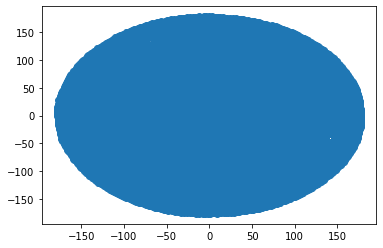

In [17]:
#Apply TSNE to further reduce dimensions
# Initialize t-SNE model
tsne = TSNE(learning_rate= 'auto')

# Reduce dimensions
tsne_features = tsne.fit_transform(df_uber_pca)
tsne_features.shape

# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

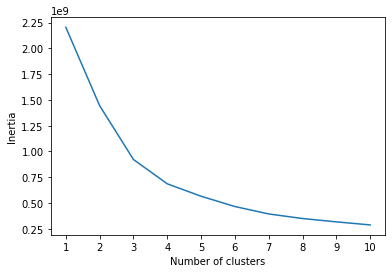

In [18]:
#Applying K-means elbow plot to find best number of clusters
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]

for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [67]:
def show_clusters(df):
    plt.scatter(df_dummy['bin_group'], df_dummy['Ride Duration'], c=df['class'])
    plt.xlabel('bin_group')
    plt.ylabel('Ride Duration')
    plt.show()

In [36]:
df1.head()

,PULocationID,DOLocationID,Zone,Ride Duration,bins
0,237,263,Upper East Side South,420.0,Midnight-2am
1,45,263,Chinatown,1020.0,Midnight-2am
2,170,263,Murray Hill,660.0,Midnight-2am
3,263,236,Yorkville West,300.0,Midnight-2am
4,263,148,Yorkville West,1020.0,Midnight-2am


In [63]:
df1["bin_group"] = LabelEncoder().fit_transform(df1['bins'])
df1.head()

,PULocationID,DOLocationID,Zone,Ride Duration,bins,bin_group
0,237,263,Upper East Side South,420.0,Midnight-2am,10
1,45,263,Chinatown,1020.0,Midnight-2am,10
2,170,263,Murray Hill,660.0,Midnight-2am,10
3,263,236,Yorkville West,300.0,Midnight-2am,10
4,263,148,Yorkville West,1020.0,Midnight-2am,10


In [64]:
df1_dummy = pd.get_dummies(df1)
df1_dummy.head()

,PULocationID,DOLocationID,Ride Duration,bin_group,Zone_Alphabet City,Zone_Battery Park,Zone_Battery Park City,Zone_Bloomingdale,Zone_Central Harlem,Zone_Central Harlem North,...,bins_4am-6am,bins_6am-8am,bins_8am-10am,bins_10am-noon,bins_noon-2pm,bins_2pm-4pm,bins_4pm-6pm,bins_6pm-8pm,bins_8pm-10pm,bins_10pm-midnight
0,237,263,420.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,263,1020.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,170,263,660.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,263,236,300.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263,148,1020.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
clusters = get_clusters(7, df1_dummy)

In [66]:
clusters.head()

,PULocationID,DOLocationID,Ride Duration,bin_group,Zone_Alphabet City,Zone_Battery Park,Zone_Battery Park City,Zone_Bloomingdale,Zone_Central Harlem,Zone_Central Harlem North,...,bins_6am-8am,bins_8am-10am,bins_10am-noon,bins_noon-2pm,bins_2pm-4pm,bins_4pm-6pm,bins_6pm-8pm,bins_8pm-10pm,bins_10pm-midnight,class
0,237,263,420.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,45,263,1020.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,170,263,660.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,263,236,300.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,263,148,1020.0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [68]:
show_clusters(clusters)

KeyError: ignored